### Fashion-MNIST is a dataset of Zalando's fashion article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let us get the Fashion MNIST dataset using TensorFlow Keras API as below

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

Thus we see that training dataset has 60000 images (rows) each of size (28,28) or 28x28 i.e. 2-D images, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for black and 255 for white.

Since a convolutional layer takes a 2-D image (2-D array) as input, we needn't convert 
these 2-D images to a 1-D arrays 

If we had to feed these 2-D images to a DNN (hidden layer), which expects a 1-D array as input, we would
have to convert these 2-D iamges to 1-D arrays before feeding to hidden layer (DNN)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

The class labels for Fashion MNIST are:
<br>
<br>
<b>Label</b> &nbsp;  <b>Description</b>
<br>
0   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   T-shirt/top
<br>
1   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Trouser
<br>
2   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Pullover
<br>
3   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Dress
<br>
4   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Coat
<br>
5   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sandal
<br>
6   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Shirt
<br>
7   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Sneaker
<br>
8   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Bag
<br>
9   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Ankle boot
<br>

Now, let us view one of the images (at index/instance no. 220) of Fashion MNIST Training dataset, how it looks

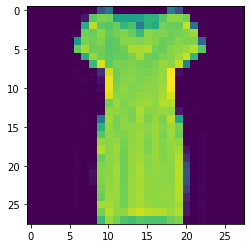

In [ ]:
plt.figure()
plt.imshow(np.squeeze(train_images[20]))

In [ ]:
train_labels[20]

3

So, we see that image at index (instance no.) 220 is a bag, and the corresponding label value also indicates the same (8 - Bag).

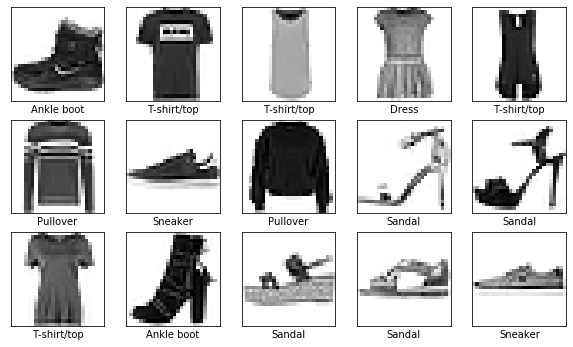

In [ ]:
# Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])   
plt.show()

Now, since, we have one more dimension for the images i.e. Channels (color), let us add it to the dimensions of train_images and test_images by using reshape() function. In this case, it is a single color (hence, channels=1) i.e. 'grayscale'.

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

The pixel values for the images lie between 0 to 255 now, which is a large range. 

Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255

In [ ]:
train_images_norm = train_images / 255.0

In [ ]:
test_images_norm = test_images / 255.0

Let us now create convolutional layers for our CNN model

In [ ]:
# First convolutional layer. 
# Number of filters = 32
# filter(kernel) size = 3x3
# Activation function = Relu
# input data (images) size (height, width, channels) = (28, 28, 1)
# Channels is 'colors' here. Since fashion MNIST images are grayscale, number of colors = 1, hence, channels = 1

conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), padding='same' )


In [ ]:
# Second convolutional layer. 
# Number of filters = 64
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv1 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv2 = layers.Conv2D(64, (3,3), activation='relu')


In [ ]:
# Second convolutional layer. 
# Number of filters = 128
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv2 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv3 = layers.Conv2D(128, (3,3), activation='relu')


Let us create a Max Pooing Layer

In [ ]:
# Max Pool Layer
# Since input to CNN is a 2-D image and ouput from last convolutional layer (featuerMap) is also 2-D array 
# (except the third dimension i.e. channels), we will use 2D version of Max Pooling function of TensorFlow Keras
# to create a Max Pooling Layer, as shown below filter (kernel) size for Pooling Layer = 2x2

#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))


Let us create a Fully Connected Layer (Hidden Layer) and an Output Layer to perform Classification

In [ ]:
# Fully Connected (FC) Layer i.e. hidden layer expects input in 1-D format (1-D array), hence, we need to convert
# 2-D output (2-D array) of last convolutional layer (conv3) to 1-D array i.e. we need to flatten the 2-D array
# to 1-D array

flat_layer = layers.Flatten()


In [ ]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to the number of neurons in just
# immediate previous convolutional layer

fc = layers.Dense(128, activation='relu')


In [ ]:
# Output Layer - with 10 neurons (as we have 10 output classes) and using 'softmax' function

output = layers.Dense(10, 'softmax')


Let us now create the model (CNN model) structure using the above defined layers

In [ ]:
# TensorFlow Keras uses Keras Sequential API

model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)


In [ ]:
# Let us see what all layers our model has

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Let us now specify the optimizer(adam), loss function(crossentropy) and metrics(accuracy) for this model

NOTE: Use sparse categorical crossentropy when your classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and categorical crossentropy when one sample can have multiple classes or labels are soft probabilities (like [0.5, 0.3, 0.2]).

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_images_500 = train_images_norm[:500] #  Total - 600000
train_labels_500 = train_labels[:500]

test_images_200 = test_images_norm[:200] # total --- 10000
test_labels_200 = test_labels[:200]

Now let us train the model and also perform the cross validation and hyperparameter tuning. Passing validation_split parameter to fit() method ensures that cross validation and hyperparameter tuning also happens during the training.

In [ ]:
# we are using the normalized input data

# Let us perform 20 epochs with batch_size as 512, and with shuffling = true 

# shuffle=true will shuffle the indexes of the instances in order to allocate different sets of instances 
# in validation dataset each time cross-validation runs

# validation split=0.1 means a validation dataset of size of 10% is created from the training dataset for cross validation = 50

model.fit(train_images_500, train_labels_500, epochs=15, batch_size=50, shuffle=True, validation_split=0.1) 

Train on 450 samples, validate on 50 samples
Epoch 1/15
450/450 [==============================] - 2s 4ms/sample - loss: 0.4869 - accuracy: 0.8333 - val_loss: 0.5772 - val_accuracy: 0.7600
Epoch 2/15
450/450 [==============================] - 2s 4ms/sample - loss: 0.3847 - accuracy: 0.8644 - val_loss: 0.5590 - val_accuracy: 0.8200
Epoch 3/15
450/450 [==============================] - 2s 4ms/sample - loss: 0.3123 - accuracy: 0.8978 - val_loss: 0.6210 - val_accuracy: 0.7600
Epoch 4/15
450/450 [==============================] - 2s 4ms/sample - loss: 0.2425 - accuracy: 0.9222 - val_loss: 0.5844 - val_accuracy: 0.7800
Epoch 5/15
450/450 [==============================] - 2s 4ms/sample - loss: 0.1646 - accuracy: 0.9467 - val_loss: 0.6378 - val_accuracy: 0.7800
Epoch 6/15
450/450 [==============================] - 2s 4ms/sample - loss: 0.1091 - accuracy: 0.9667 - val_loss: 0.7318 - val_accuracy: 0.7600
Epoch 7/15
450/450 [==============================] - 2s 4ms/sample - loss: 0.1597 - accura

Let us now make predictions on Test dataset using the above trained model

In [ ]:
# we are using the normalized input data
test_loss, test_accuracy = model.evaluate(test_images_200, test_labels_200)

200/200 [==============================] - 0s 1ms/sample - loss: 252.6938 - accuracy: 0.8100


In [ ]:
print(test_accuracy)

0.81


In [ ]:
model.predict(test_images_200[0:1]).argmax()

9

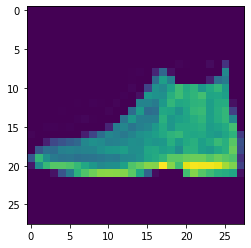

In [ ]:
plt.figure()
plt.imshow(np.squeeze(test_images_200[0]))

when the model is overfitting 

Deep learning models generally tend to be perform well on the Training data, but not on the Test data (Overfitting).

The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters (number of layers and the number of neurons per layer). Second option to remove overfitting is to use Regularization techniques like - L1, L2, Dropout.

If the neural network has less number of layers and neurons per layer, it may not perform well even on the Training dataset i.e. may lead to Underfitting issue. 
And if neural network has more number of layers and neurons per layer, it may perform very well (high accuracy) on the Training dataset, but may not perform well on Test dataset i.e. may lead to Overfitting issue. 

Unfortunately, there is no definite formula to determine the right architecture of your model (number of layers, number of neurons in each layer). You will have to find the right(optimum) architecture by trial and error (experimentation) method only.

Though, for neural networks, we have other regularization techniques like L1, L2 regularization, <b>Dropout is the most effective of all and most commonly used regularization technique </b>.

Dropout, when applied to a layer, involves of randomly "dropping out" (i.e. set to zero) a number of output features (neurons) of the layer. Let's say output of a layer before applying Dropout was [05, 0.8, 2.2, 0.9, 0.1], after applying dropout, the output will be [0, 0.8. 2.2, 0, 0.1].

The "dropout rate" is the fraction of the features(neurons) that are being zeroed-out in the layer. Generally the value of dropout rate is kept between 0.2 and 0.5. 

Please note that, <b>Dropout is applied only during the Training phase</b>, and TensorFlow Keras API (evaluate() method) takes care of it internally, we don't need to remove the Dropout layer explicitly(manually) from the model at the time of prediction on the Test dataset.</b>

In the Test phase, Dropout is not applied, instead the layer's output values are reduced by a factor equal to the dropout rate, so as to give a feeling that during Test phase also almost same number of neurons are active there were during the Training phase.

Hence, to remove Overfitting issue in our case here, let us apply the regularization technique - Dropout.



To implement the Dropout using TensorFlow Keras, we create a Dropout layer, and place this Dropout layer immediately after the layer to which this Dropout needs to be applied to.


##### <b>Please note that the Dropout layer for all the convolutional layers will be applied after the pooling layer (max. pool layer)</b>


<b>NOTE:If there is a Pooling layer after a convolutional layer, the dropout layer is applied after the pooling layer</b> (not just after the convolutional layer, i.e. between the convolutional layer and the pooling layer)

#### NOTE: Use sparse categorical crossentropy when your classes are mutually exclusive (e.g. when each sample belongs exactly to one class) and categorical crossentropy when one sample can have multiple classes or labels are soft probabilities (like [0.5, 0.3, 0.2]).

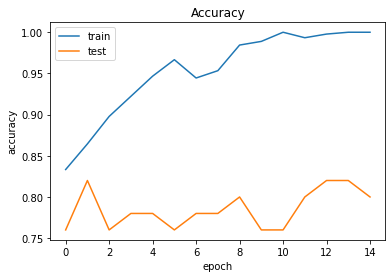

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()